<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import tensorflow as tf

c:\users\81801\.conda\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\81801\.conda\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\81801\.conda\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\81801\.conda\envs\keras\lib\site-packages\tensorflow\python\framework\dty

In [6]:
from tensorflow.examples.tutorials.mnist import input_data

In [7]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import scale,StandardScaler,RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import linkage, dendrogram,cut_tree

In [56]:
df = pd.read_csv("Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [57]:
df.isnull().all()

country       False
child_mort    False
exports       False
health        False
imports       False
income        False
inflation     False
life_expec    False
total_fer     False
gdpp          False
dtype: bool

In [58]:
print(len(df["country"].unique()))

167


In [59]:
df.shape #データの次元を確認する

(167, 10)

In [60]:
df.set_index("country",inplace=True)

In [61]:
df.describe() #　基礎統計量を表示する

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [62]:
df.info() # 型を確認する

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


child_mort       AxesSubplot(0.125,0.657941;0.227941x0.222059)
exports       AxesSubplot(0.398529,0.657941;0.227941x0.222059)
health        AxesSubplot(0.672059,0.657941;0.227941x0.222059)
imports          AxesSubplot(0.125,0.391471;0.227941x0.222059)
income        AxesSubplot(0.398529,0.391471;0.227941x0.222059)
inflation     AxesSubplot(0.672059,0.391471;0.227941x0.222059)
life_expec          AxesSubplot(0.125,0.125;0.227941x0.222059)
total_fer        AxesSubplot(0.398529,0.125;0.227941x0.222059)
gdpp             AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

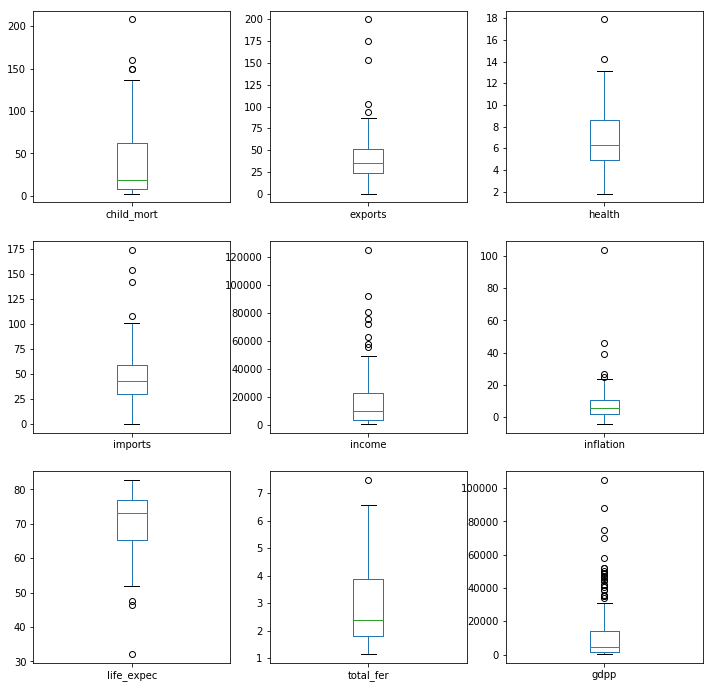

In [63]:
df.plot(kind="box",subplots=True,layout=(3,3),sharex=False,figsize=(12,12))
# o は外れ値

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AA6BA2C748>,
      dtype=object)

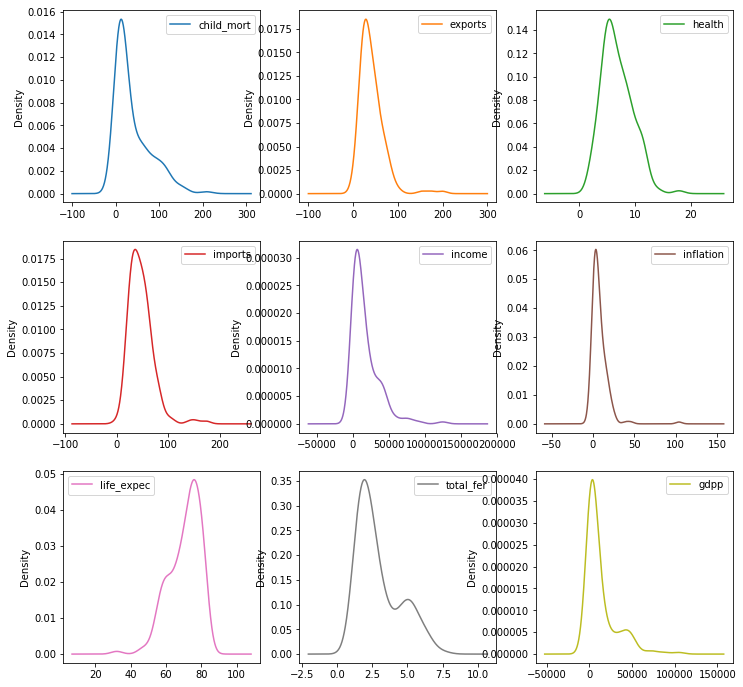

In [64]:
df.plot(kind="density",subplots=True,layout=(3,3),sharex=False,figsize=(12,12))

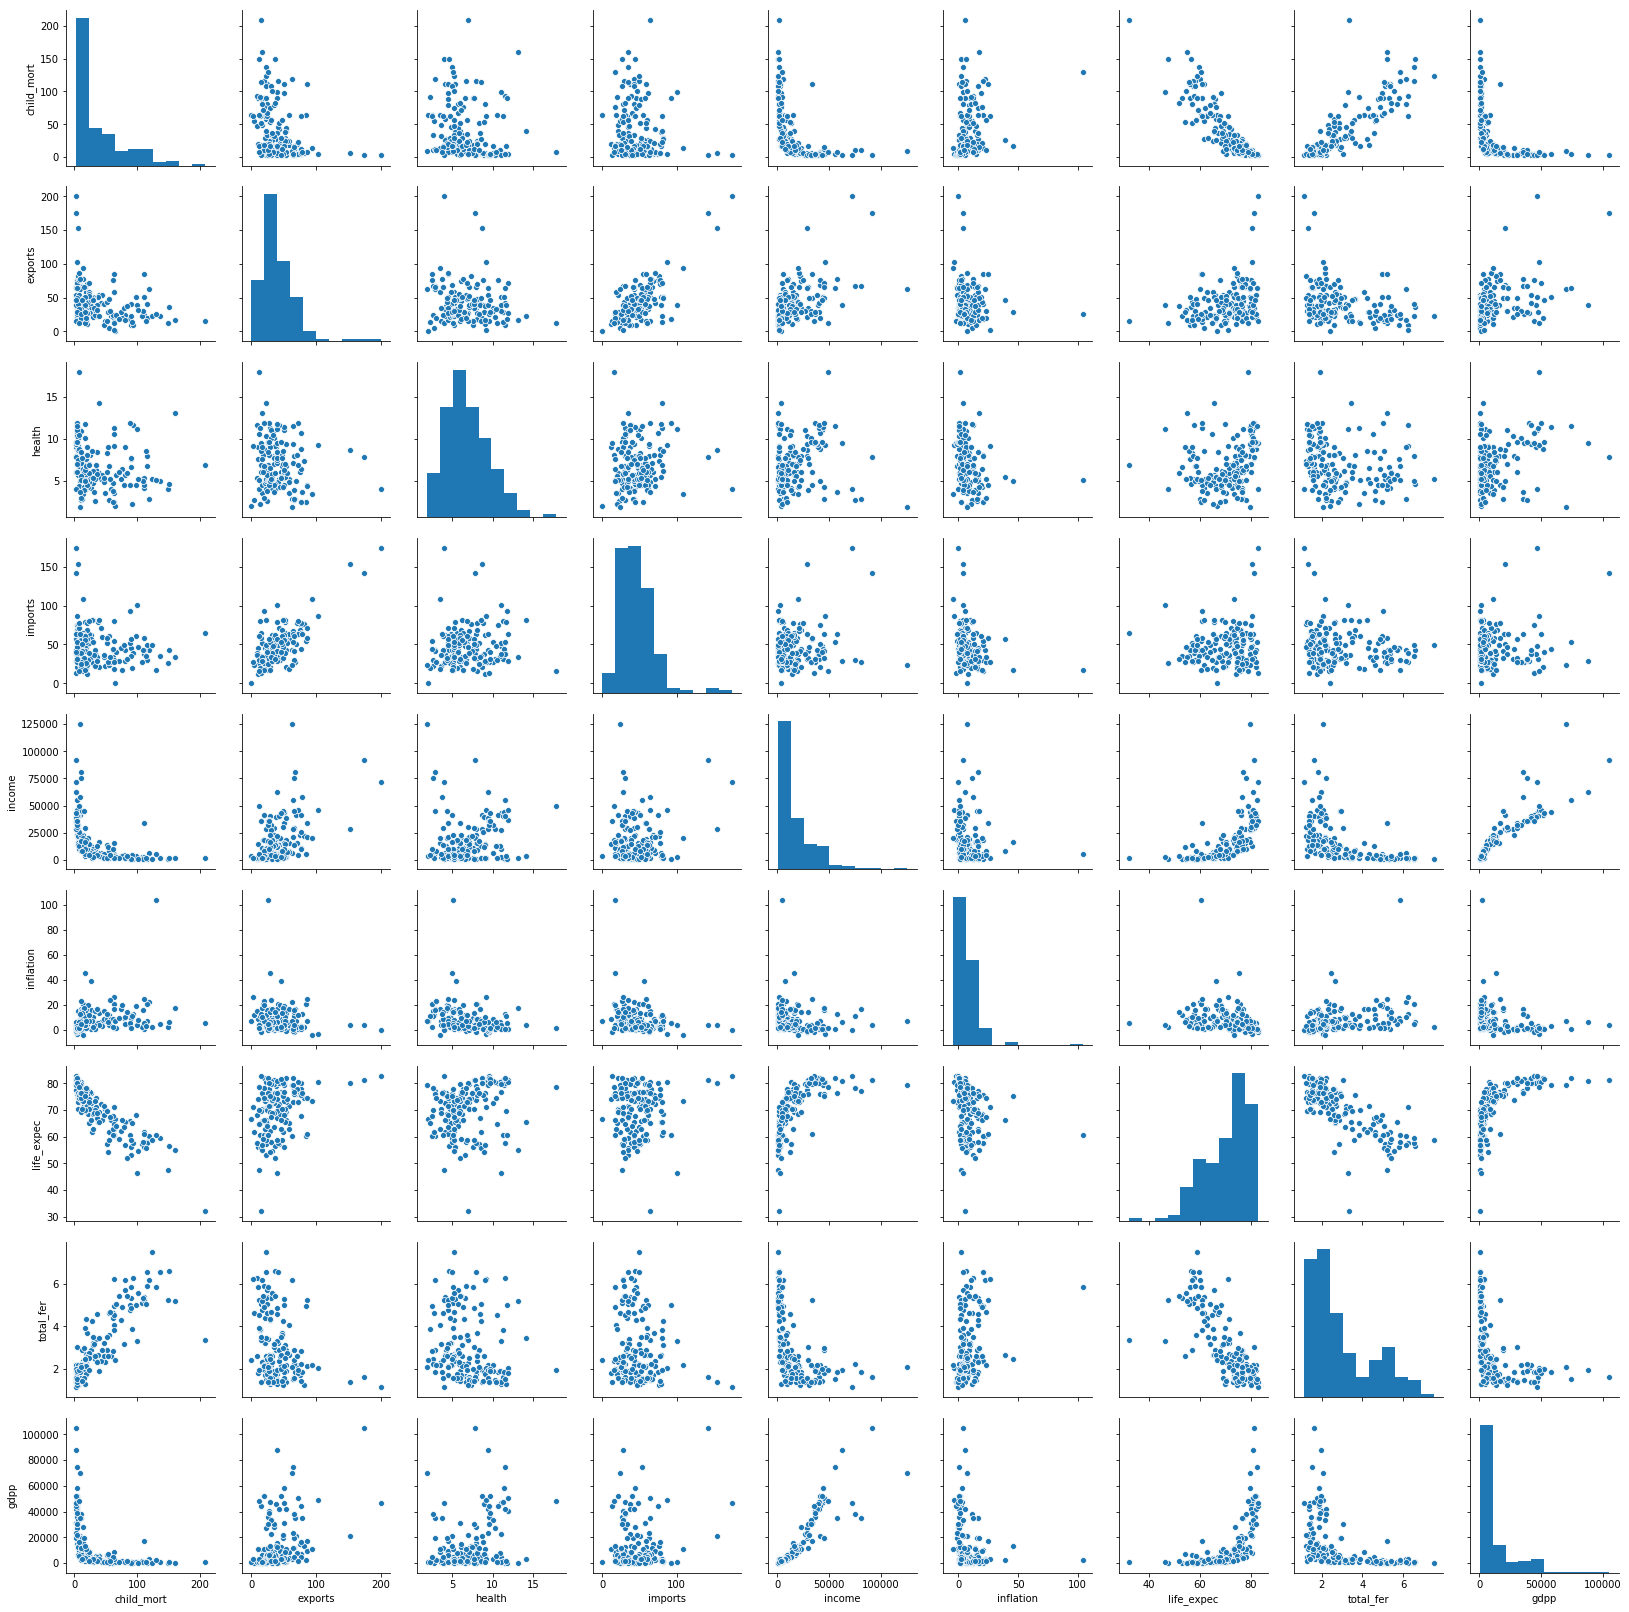

In [65]:
sns.pairplot(df)

In [103]:
df=df.rename(columns={"gdpp":"gdp_per_capita"})
df.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       ...
       'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay',
       'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia'],
      dtype='object', name='country', length=167)

In [67]:
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()

In [68]:
df_new= robust_scaler.fit_transform(df)

In [69]:
df_new.std(axis=0)
df_new

array([[ 1.31662024, -0.90744102,  0.3423913 , ..., -1.46956522,
         1.63549161, -0.32287736],
       [-0.05013928, -0.25408348,  0.0625    , ...,  0.27826087,
        -0.36450839, -0.04481132],
       [ 0.14856082,  0.12341198, -0.58423913, ...,  0.29565217,
         0.23021583, -0.01572327],
       ...,
       [ 0.07428041,  1.3430127 ,  0.14130435, ...,  0.        ,
        -0.2206235 , -0.26336478],
       [ 0.68709378, -0.1814882 , -0.30978261, ..., -0.48695652,
         1.08393285, -0.26336478],
       [ 1.18477252,  0.07259528, -0.11684783, ..., -1.83478261,
         1.43405276, -0.25157233]])

In [86]:
pca = PCA(n_components=5)

In [91]:
pca_array=pca.fit_transform(df_new)
pca_array.shape

(167, 5)

In [72]:
#pca_array = pca.components_
#pca_array.shape

In [88]:
pca.explained_variance_ratio_

array([0.48841948, 0.16547786, 0.14891017, 0.0942477 , 0.0600765 ])

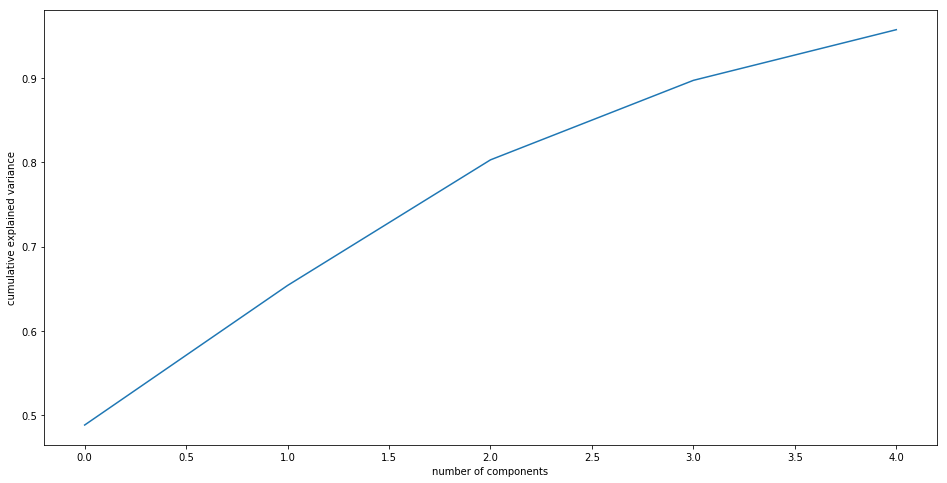

In [89]:
fig = plt.figure(figsize=(16,8))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

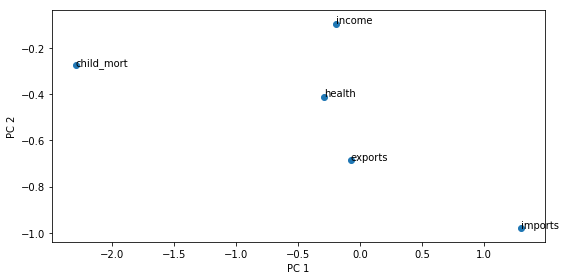

In [111]:
df_PC = pd.DataFrame({ 'Feature':df.columns[0:5],
                       'PC 1': pca_array[0],
                       'PC 2': pca_array[1],
                       'PC 3': pca_array[2],
                       'PC 4': pca_array[3],
                       'PC 5': pca_array[4]})
df_PC.set_index('Feature', inplace = True)
fig = plt.figure(figsize = (8,4))
plt.scatter(df_PC['PC 1'], df_PC['PC 2'])
plt.xlabel('PC 1')
plt.ylabel('PC 2')

for i, txt in enumerate(df_PC.index):
    plt.annotate(txt, (df_PC['PC 1'][i],df_PC['PC 2'][i]))
plt.tight_layout()
plt.show()

In [113]:
#df_PCA = pd.DataFrame(pca_array,columns=['PC 1','PC 2', 'PC 3', 'PC 4', 'PC 5'])

In [96]:
PCA_array[0:5]

array([[-0.26061336,  0.2904018 ,  0.11566358,  0.12890747,  0.44016459,
        -0.22683049,  0.29095578, -0.24274147,  0.65496309],
       [ 0.07227785, -0.04714366, -0.11104361, -0.29372587,  0.24578561,
         0.85898068,  0.00911358,  0.10025507,  0.29249838],
       [ 0.10178039,  0.69001004, -0.2523583 ,  0.58202921,  0.00590098,
         0.24236481, -0.13644064,  0.08006408, -0.16517371],
       [ 0.53293158, -0.03613139,  0.22235101,  0.07769066,  0.10065492,
        -0.21150345, -0.45381002,  0.47853715,  0.41157768],
       [ 0.09787774,  0.06118614, -0.83083889, -0.34620012,  0.25759935,
        -0.31488705, -0.05748124,  0.08778621,  0.00257575]])

In [97]:
pca.explained_variance_ratio_

array([0.48841948, 0.16547786, 0.14891017, 0.0942477 , 0.0600765 ])

In [114]:
df_PCA = pd.DataFrame(pca_array,columns= ['PC 1','PC 2', 'PC 3', 'PC 4', 'PC 5'])

In [115]:
df_PCA.set_index(df.index,inplace=True)
df_PCA

,PC 1,PC 2,PC 3,PC 4,PC 5
country,,,,,
Afghanistan,-2.294559,-0.075365,-0.291972,1.299940,-0.197165
Albania,-0.274220,-0.685631,-0.410398,-0.979856,-0.094039
Algeria,-0.716441,0.781060,0.038956,-1.048829,0.376110
Angola,-2.059689,1.424454,1.636721,0.961193,0.659263
Antigua and Barbuda,0.630218,-0.781486,0.088919,-0.596073,0.174139
Argentina,-0.453014,1.480341,-1.012689,-0.940679,-0.500446
Armenia,-0.721542,-0.318606,-0.371362,-1.089358,0.276306
Australia,3.010149,0.726968,-2.110703,0.598449,0.237184
Austria,3.347081,0.182597,-0.873309,0.563601,-0.512650


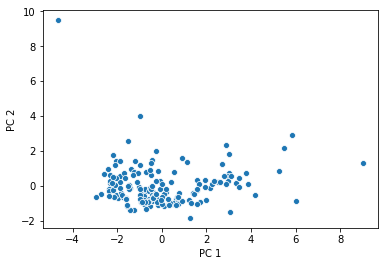

In [110]:
sns.scatterplot(x="PC 1",y="PC 2",data=df_PCA)
plt.show()